Partie 1 : Analyse Exploratoire des Données (EDA)

Objectifs
- Comprendre la structure des données
- Identifier les patterns et tendances
- Détecter les problèmes potentiels (valeurs manquantes, outliers, etc.)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


1.1 - Chargement des Données

**TODO :** Charger les 3 fichiers CSV (users, products, interactions)


In [4]:
# TODO : Charger les données
DATA_PATH = "../data/"

# Chargez users.csv
users_df = pd.read_csv(DATA_PATH + "users.csv")

# Chargez products.csv
products_df = pd.read_csv(DATA_PATH + "products.csv")

# Chargez interactions.csv
interactions_df = pd.read_csv(DATA_PATH + "interactions.csv")

print(" Données chargées")


 Données chargées


1.2 - Exploration Initiale

**Questions à répondre :**
- Combien d'utilisateurs uniques ?
- Combien de produits différents ?
- Combien d'interactions au total ?
- Quelle est la structure de chaque DataFrame ?


In [5]:
# TODO : Afficher les informations de base

print("=== UTILISATEURS ===")

print(users_df.head())
print("\nShape :", users_df.shape)
print("\nTypes de données :", users_df.dtypes)


print("\n=== PRODUITS ===")

print(products_df.head())
print("\nShape :", products_df.shape)
print("\nTypes de données :", products_df.dtypes)


print("\n=== INTERACTIONS ===")

print(interactions_df.head())
print("\nShape :", interactions_df.shape)
print("\nTypes de données :", interactions_df.dtypes)


=== UTILISATEURS ===
   user_id  age gender  location           registration_date  activity_level
0        1   33      M        69  2025-08-20 10:25:45.743084               2
1        2   28      M        75  2024-02-27 10:25:45.743084               2
2        3   35      M        67  2023-11-30 10:25:45.743084               2
3        4   42      M        31  2024-08-12 10:25:45.743084               2
4        5   28      M        69  2024-07-12 10:25:45.743084               1

Shape : (5000, 6)

Types de données : user_id               int64
age                   int64
gender               object
location              int64
registration_date    object
activity_level        int64
dtype: object

=== PRODUITS ===
   product_id                                name     category  \
0           1  Dell Photo Appareil Photo Standard        Photo   
1           2      Xiaomi Ordinateurs Laptop Plus  Ordinateurs   
2           3        Sony Ordinateurs Desktop Pro  Ordinateurs   
3           4 

*nombre d'utilisateur unique ?*

In [6]:
num_users = users_df['user_id'].nunique()
print(f"Nombre d'utilisateurs uniques : {num_users}")

Nombre d'utilisateurs uniques : 5000


*nombre de produit différent ?*

In [7]:
num_products = products_df['product_id'].nunique()
print(f"Nombre de produits uniques : {num_products}")

Nombre de produits uniques : 1000


*distribution des inetractions par utilisateur ?*

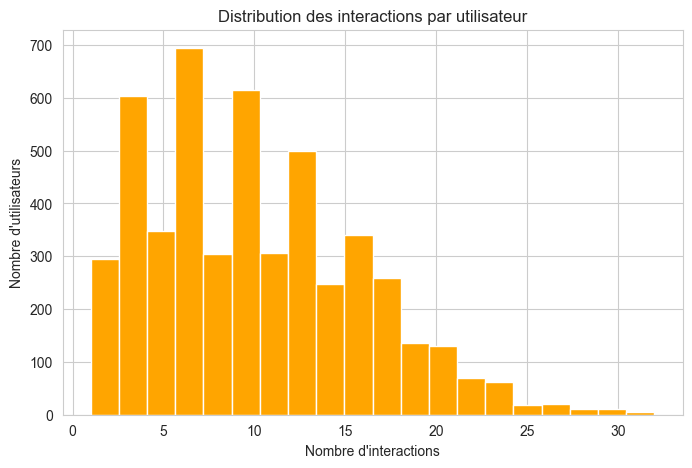

In [36]:
interactions_per_user = interactions_df.groupby('user_id').size()

plt.figure(figsize=(8,5))
plt.hist(interactions_per_user, bins=20, color='orange', edgecolor='white')
plt.title("Distribution des interactions par utilisateur")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

*Taux d’interactions par produit ?*

In [ ]:
interactions_per_product = interactions_df.groupby('product_id').size().reset_index(name='num_interactions')

total_interactions = len(interactions_df)
interactions_per_product['interaction_rate'] = interactions_per_product['num_interactions'] / total_interactions

interactions_per_product.sort_values(by='interaction_rate', ascending=False).head(10)


,product_id,num_interactions,interaction_rate
852,853,84,0.00168
674,675,80,0.00160
81,82,79,0.00158
888,889,76,0.00152
623,624,75,0.00150
581,582,74,0.00148
497,498,73,0.00146
395,396,73,0.00146
113,114,73,0.00146
11,12,72,0.00144


1.3 - Analyse des Distributions

**TODO :** Visualisez les distributions principales


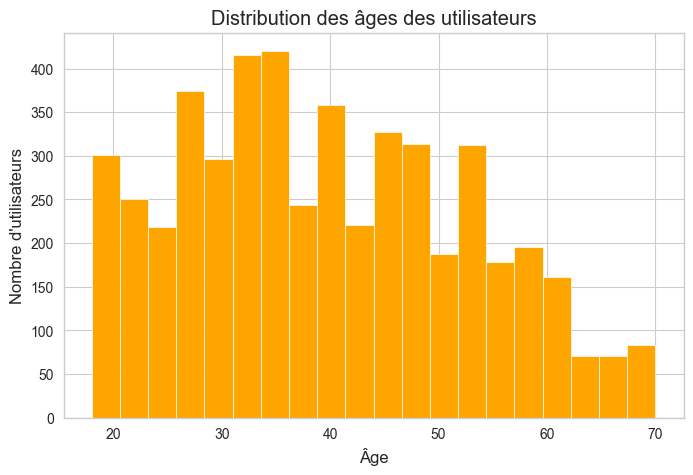

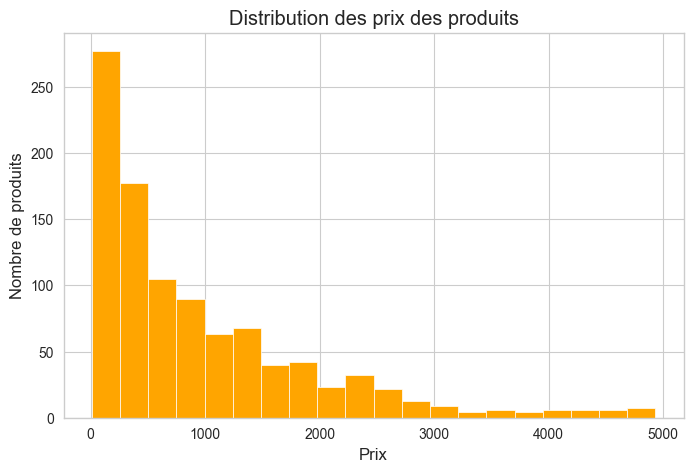

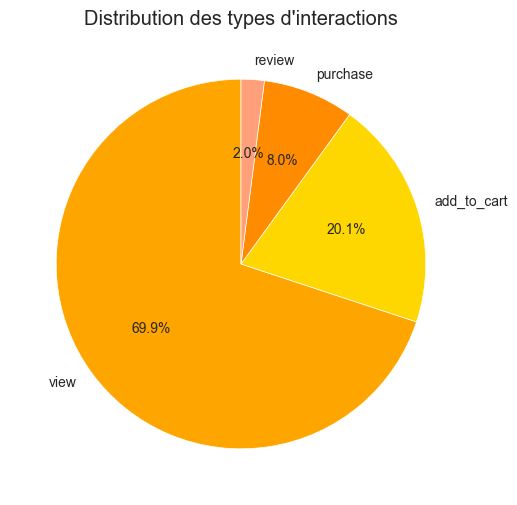

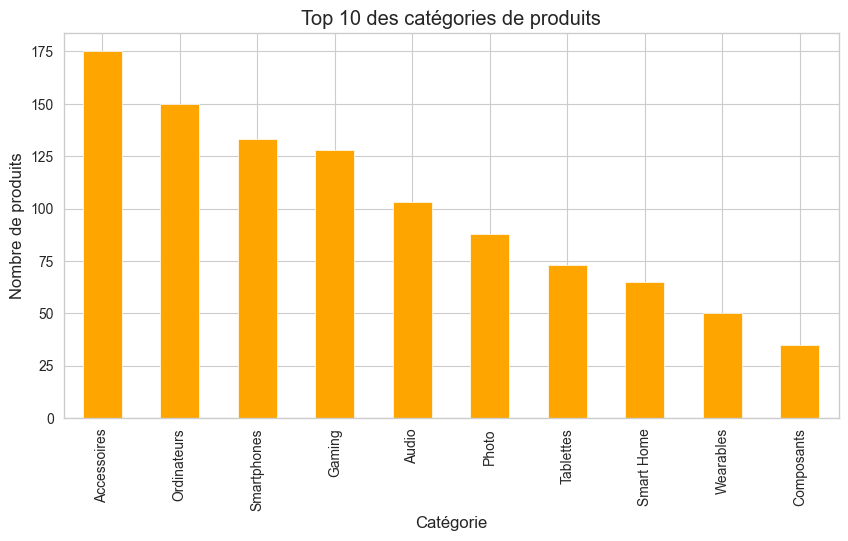

In [52]:
# TODO : Créer des visualisations

import matplotlib.pyplot as plt


# 1. Distribution des âges
plt.figure(figsize=(8, 5))
plt.hist(users_df['age'], bins=20, color='orange', edgecolor='white')
plt.title("Distribution des âges des utilisateurs")
plt.xlabel("Âge")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

# 2. Distribution des prix
plt.figure(figsize=(8, 5))
plt.hist(products_df['price'], bins=20, color='orange', edgecolor='white')
plt.title("Distribution des prix des produits")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")
plt.show()

# 3. Distribution des types d'interactions
plt.figure(figsize=(6, 6))
interactions_df['interaction_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['orange', 'gold', 'darkorange', 'lightsalmon'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribution des types d'interactions")
plt.ylabel("")
plt.show()

# 4. Top 10 des catégories de produits
plt.figure(figsize=(10, 5))
top_categories = products_df['category'].value_counts().head(10)
top_categories.plot(kind='bar', color='orange', edgecolor='white')
plt.title("Top 10 des catégories de produits")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de produits")
plt.show()

*Identifier % de nouveaux utilisateurs (< 3 interactions)*

In [18]:
interactions_per_user = interactions_df.groupby('user_id').size()

new_users = interactions_per_user[interactions_per_user < 3]

pct_new_users = 100 * len(new_users) / interactions_per_user.shape[0]
print(f"% de nouveaux utilisateurs (<3 interactions) : {pct_new_users:.2f}%")


% de nouveaux utilisateurs (<3 interactions) : 5.91%


*Identifier % de nouveaux produits (< 5 interactions)*

In [19]:
interactions_per_product = interactions_df.groupby('product_id').size()

new_products = interactions_per_product[interactions_per_product < 5]

pct_new_products = 100 * len(new_products) / interactions_per_product.shape[0]
print(f"% de nouveaux produits (<5 interactions) : {pct_new_products:.2f}%")


% de nouveaux produits (<5 interactions) : 0.00%


*Proposer des stratégies adaptées* : 

ajouter de nouveau produit

*Courbe temporelle*

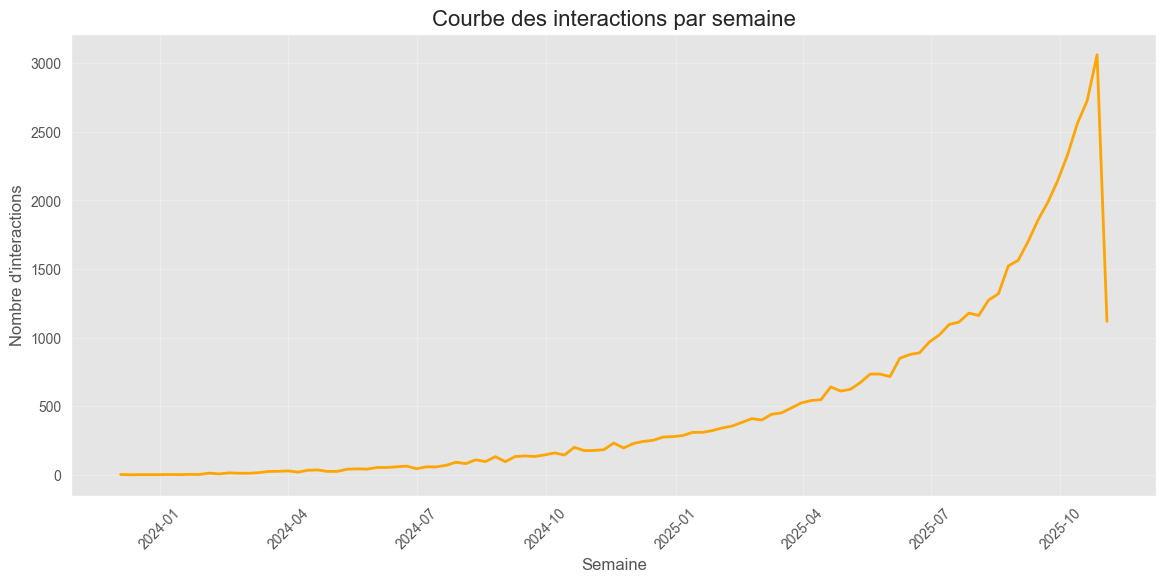

In [30]:
weekly_activity = interactions_df.groupby(interactions_df['interaction_date'].dt.to_period('W')).size().reset_index(name='count')
weekly_activity['interaction_date'] = weekly_activity['interaction_date'].dt.start_time

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
plt.plot(weekly_activity['interaction_date'], weekly_activity['count'], color='Orange', linewidth=2)
plt.title("Courbe des interactions par semaine", fontsize=16)
plt.xlabel("Semaine", fontsize=12)
plt.ylabel("Nombre d'interactions", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()
